*The **Dairy Goods Sales** Dataset provides a detailed and comprehensive collection of data related to dairy farms,products, sales, including farm location, land area, cow population, farm size, production dates...The dairy industry refers to the processing and manufacturing of raw milk into various products such as **Ice Cream,Milk,Yogurt,Cheese,Buttermilk,Curd** etc.The purpose of this project is to find out the most important factors for sales of dairy products.Through this project, we conclude that which product and which state produce more products and reasons for the production.It also assess product profitability by comparing prices and revenue, and study the impact of price changes on sales.*


We suppose that the quantity of sales depends on the year, month, group, item and average price.At the end of the study we found out that “year” and “group” are factors which mostly influence the quantity of a sale. Factors “month”, “item” and “average sale price” do not affect the quantity of a single sale.

### importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read Dataset

*load the dataset into a pandas dataframe*

In [2]:
data=pd.read_csv(r'C:\data.science\datasets\dairy_dataset.csv')
data

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


#### Display first few rows of the dataset

In [3]:
data.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


#### Display last few rows of the dataset

In [4]:
data.tail()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84
4324,Rajasthan,492.86,58,Large,2019-01-20,1,Milk,Mother Dairy,820.50,49.31,...,2019-01-06,2019-01-07,417,44.55,18577.35,Madhya Pradesh,Online,403,22.34,189.63


## Basic information about dataset

* Getting information about Dataframe,including datatypes and misssing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [6]:
data.shape

(4325, 23)

* Dataframe contains 4325rows and 23 columns

#### describing the data

In [7]:
data.describe()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000


sum of duplicates values

In [8]:
data.duplicated().sum()

0

Null values

In [9]:
data.isnull().sum()

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
dtype: int64

In [10]:
data.count()

Location                               4325
Total Land Area (acres)                4325
Number of Cows                         4325
Farm Size                              4325
Date                                   4325
Product ID                             4325
Product Name                           4325
Brand                                  4325
Quantity (liters/kg)                   4325
Price per Unit                         4325
Total Value                            4325
Shelf Life (days)                      4325
Storage Condition                      4325
Production Date                        4325
Expiration Date                        4325
Quantity Sold (liters/kg)              4325
Price per Unit (sold)                  4325
Approx. Total Revenue(INR)             4325
Customer Location                      4325
Sales Channel                          4325
Quantity in Stock (liters/kg)          4325
Minimum Stock Threshold (liters/kg)    4325
Reorder Quantity (liters/kg)    

#### Renaming the columns

In [11]:
for i in data:
    j=i.replace(' ','_')
    data=data.rename(columns={i:j.capitalize()})
data

,Location,Total_land_area_(acres),Number_of_cows,Farm_size,Date,Product_id,Product_name,Brand,Quantity_(liters/kg),Price_per_unit,...,Production_date,Expiration_date,Quantity_sold_(liters/kg),Price_per_unit_(sold),Approx._total_revenue(inr),Customer_location,Sales_channel,Quantity_in_stock_(liters/kg),Minimum_stock_threshold_(liters/kg),Reorder_quantity_(liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


#### column names

In [12]:
data.columns

Index(['Location', 'Total_land_area_(acres)', 'Number_of_cows', 'Farm_size',
       'Date', 'Product_id', 'Product_name', 'Brand', 'Quantity_(liters/kg)',
       'Price_per_unit', 'Total_value', 'Shelf_life_(days)',
       'Storage_condition', 'Production_date', 'Expiration_date',
       'Quantity_sold_(liters/kg)', 'Price_per_unit_(sold)',
       'Approx._total_revenue(inr)', 'Customer_location', 'Sales_channel',
       'Quantity_in_stock_(liters/kg)', 'Minimum_stock_threshold_(liters/kg)',
       'Reorder_quantity_(liters/kg)'],
      dtype='object')

## 1. Total land area(acres) across different locations?

In [13]:
land_area=data.groupby('Location')['Total_land_area_(acres)'].sum().sort_values(ascending=False).reset_index()
land_area

,Location,Total_land_area_(acres)
0,Delhi,267502.01
1,Chandigarh,262496.66
2,Uttar Pradesh,144035.27
3,Madhya Pradesh,135883.88
4,Gujarat,131749.37
5,Karnataka,129767.96
6,Kerala,128608.08
7,Maharashtra,124371.52
8,Rajasthan,124122.54
9,Bihar,123740.88


In [14]:
top_10=land_area.head(10)
top_10

,Location,Total_land_area_(acres)
0,Delhi,267502.01
1,Chandigarh,262496.66
2,Uttar Pradesh,144035.27
3,Madhya Pradesh,135883.88
4,Gujarat,131749.37
5,Karnataka,129767.96
6,Kerala,128608.08
7,Maharashtra,124371.52
8,Rajasthan,124122.54
9,Bihar,123740.88


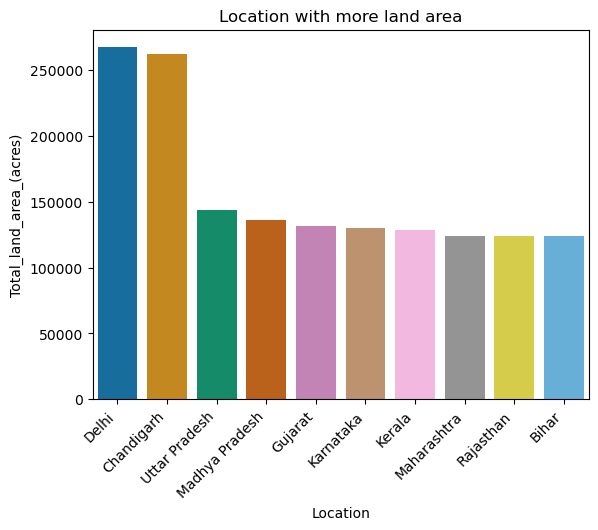

In [15]:
sns.barplot(data=top_10,x='Location',y='Total_land_area_(acres)',palette='colorblind')
plt.xticks(rotation=45,ha='right')
plt.title('Location with more land area')
plt.show()

#### ***Delhi*** has more land area about 267502 acres for the dairy farm due to *urbanisation* and *population growth*.As the population rise the demand for dairy products increases so,it needs more land area.

## 2. Where are the Dairy farm located?

In [16]:
unique_locations=data['Location'].nunique()
unique_locations

15

In [17]:
unique_locations=data['Location'].unique()
for i in unique_locations:
    print(i)

Telangana
Uttar Pradesh
Tamil Nadu
Maharashtra
Karnataka
Bihar
West Bengal
Madhya Pradesh
Chandigarh
Delhi
Gujarat
Kerala
Jharkhand
Rajasthan
Haryana


## 3. The list of products produced by Dairy farms

In [18]:
unique_products=data['Product_name'].nunique()
unique_products

10

In [19]:
unique_products=data['Product_name'].unique()
for i in unique_products:
    x=list(unique_products)
x

['Ice Cream',
 'Milk',
 'Yogurt',
 'Cheese',
 'Buttermilk',
 'Curd',
 'Paneer',
 'Lassi',
 'Ghee',
 'Butter']

## 4.Which brands are produced at each location?

In [20]:
df = pd.DataFrame(data)

# Group by location and brand
grouped = df.groupby(['Location', 'Brand']).size().reset_index(name='Count')
grouped


,Location,Brand,Count
0,Bihar,Amul,63
1,Bihar,Britannia Industries,3
2,Bihar,Dodla Dairy,11
3,Bihar,Dynamix Dairies,5
4,Bihar,Mother Dairy,57
...,...,...,...
160,West Bengal,Parag Milk Foods,6
161,West Bengal,Passion Cheese,4
162,West Bengal,Raj,36
163,West Bengal,Sudha,30


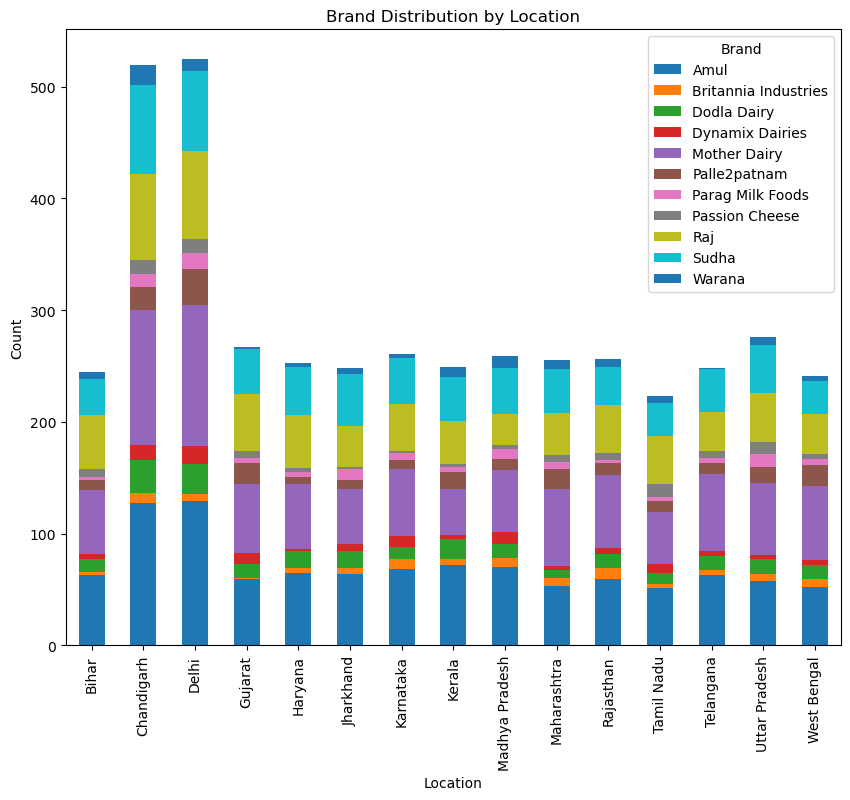

In [21]:
pivot_table = grouped.pivot(index='Location', columns='Brand', values='Count').fillna(0)


pivot_table.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Brand Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Brand', loc='upper right')
plt.show()


## 5. Products produced only in Delhi

In [22]:
df = pd.DataFrame(grouped)

delhi_products=df[df['Location'] == "Delhi"]
delhi_products.index = range(1, len(delhi_products) + 1)
delhi_products

,Location,Brand,Count
1,Delhi,Amul,129
2,Delhi,Britannia Industries,6
3,Delhi,Dodla Dairy,27
4,Delhi,Dynamix Dairies,16
5,Delhi,Mother Dairy,127
6,Delhi,Palle2patnam,32
7,Delhi,Parag Milk Foods,14
8,Delhi,Passion Cheese,13
9,Delhi,Raj,78
10,Delhi,Sudha,72


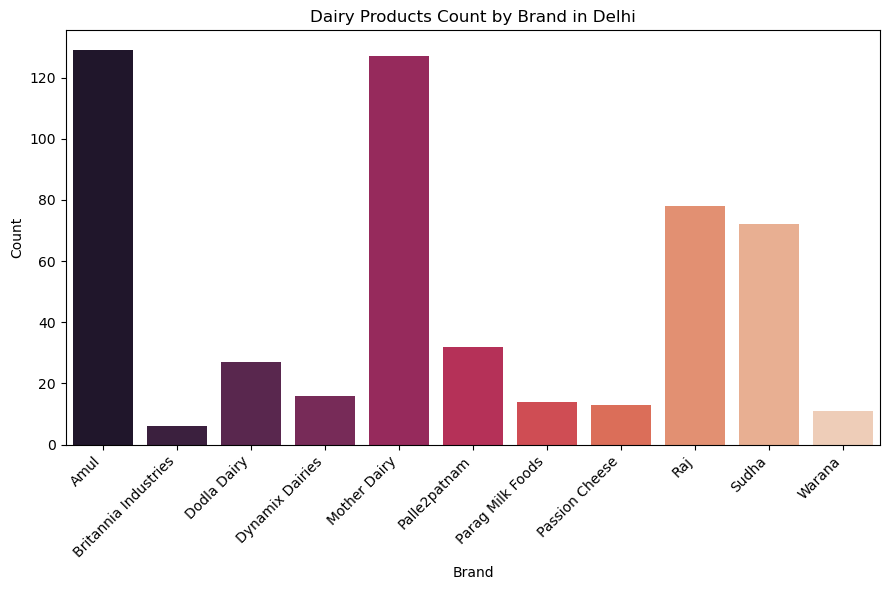

In [23]:
plt.figure(figsize=(9,6))
sns.barplot(data=delhi_products,x='Brand',y='Count',palette='rocket')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Dairy Products Count by Brand in Delhi')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

#### As mentioned earlier *Delhi* has more land area, Because of large milk market in country and company expanded its presence in the region,we can conclude from this graph that  ***Amul***  has produced more in Delhi and  ***Mother Dairy*** also follows closely with similar production quantity.

## 6. Top 5 selling products

In [24]:
data1=data.groupby('Product_name')['Quantity_sold_(liters/kg)'].sum().nlargest(5).reset_index(name='Quantity_sold_(liters/kg)')
data1

,Product_name,Quantity_sold_(liters/kg)
0,Curd,120415
1,Lassi,112731
2,Milk,109852
3,Butter,109578
4,Paneer,107931


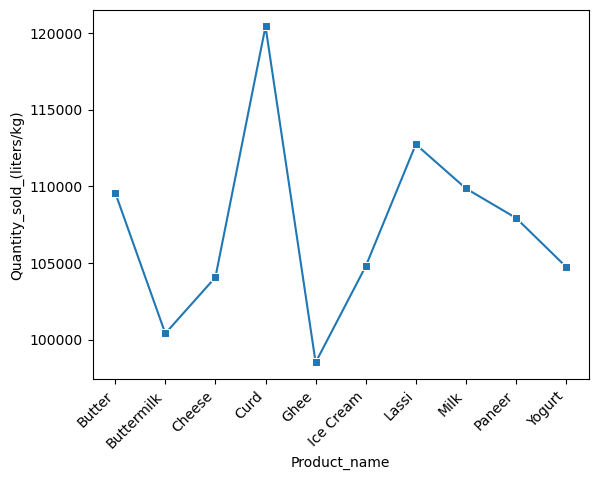

In [25]:
data1=data.groupby('Product_name')['Quantity_sold_(liters/kg)'].sum().reset_index(name='Quantity_sold_(liters/kg)')
data1

sns.lineplot(data=data1,x='Product_name',y='Quantity_sold_(liters/kg)',marker='s')
plt.xticks(rotation=45,ha='right')
plt.show()

#### ***Curd*** is one of the dairy products in India, with a large and growing consumer base due to its popularity. Amul, as India’s largest dairy brand, has played a significant role in popularizing and expanding the availability of curd. Through Amul’s distribution across everywhere, it has made curd accessible in urban and rural areas.

## 7. Average number of cows per farm

In [26]:
avg_cows=data['Number_of_cows'].mean()
print('average cows=',avg_cows)

average cows= 54.963699421965316


## 8. Top 5 products by total revenue

In [27]:
top_products=data.groupby('Product_name')['Approx._total_revenue(inr)'].sum().nlargest(5).reset_index()
top_products

,Product_name,Approx._total_revenue(inr)
0,Curd,6743880.73
1,Butter,6276041.59
2,Lassi,6130168.70
3,Milk,6021395.90
4,Paneer,5962594.91


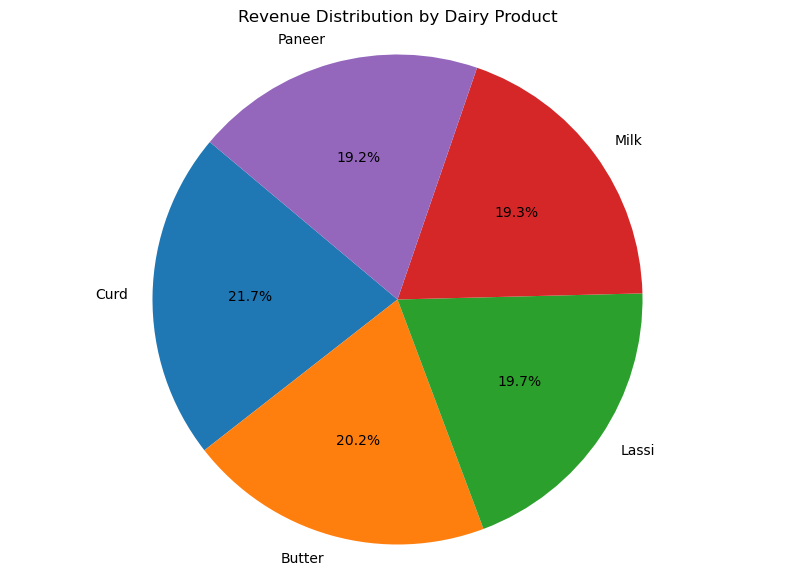

In [28]:
plt.figure(figsize=(10, 7))
plt.pie(top_products['Approx._total_revenue(inr)'], labels=top_products['Product_name'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Dairy Product')
plt.axis('equal')  
plt.show()

#### In India,the top 5 products based on revenue are ***Curd,Butter,Lassi,Milk,Paneer***.In these products Curd belongs to having high revenue about *6743880.73 inr*.

## 9. which brand has more revenue

In [29]:
more_revenue=data.groupby('Brand')['Approx._total_revenue(inr)'].sum().reset_index()
more_revenue

,Brand,Approx._total_revenue(inr)
0,Amul,14608864.46
1,Britannia Industries,1029522.05
2,Dodla Dairy,2604857.37
3,Dynamix Dairies,1479884.78
4,Mother Dairy,13766786.47
5,Palle2patnam,2528989.12
6,Parag Milk Foods,1516697.71
7,Passion Cheese,1498653.15
8,Raj,9560777.64
9,Sudha,8370109.56


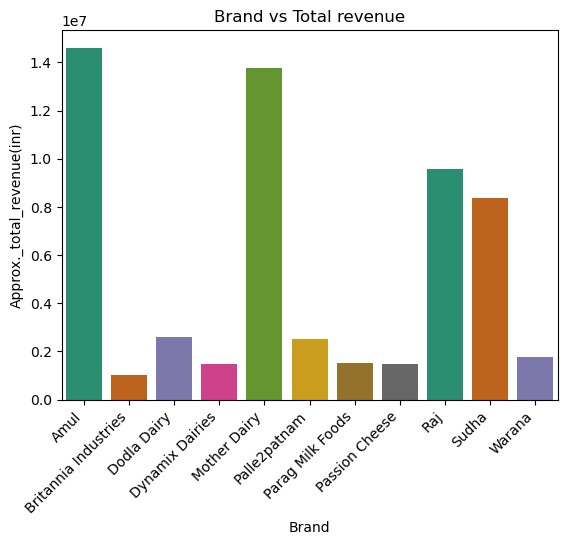

In [30]:
sns.barplot(data=more_revenue,x='Brand',y='Approx._total_revenue(inr)',palette='Dark2')
plt.title('Brand vs Total revenue')
plt.xticks(rotation=45,ha='right')
plt.show()

#### As per the graph we can infer that ***Amul*** has greatest revenue when compared to the least brand ***Britannia Industries***.Amul has a strong focus on the dairy segment, which is a high-demand category in India, whereas Britannia has a broader market with more competition.Amul is often more affordable and accessible brand, which can attract a larger customer base.

## 10. which are the different storage conditions

In [31]:
storage_cndtn=data['Storage_condition'].unique()
for i in storage_cndtn:
    print(i)

Frozen
Tetra Pack
Refrigerated
Polythene Packet
Ambient


## 11. Products and their storage conditions

In [32]:
cross_tab=pd.crosstab(data['Product_name'],data['Storage_condition']).reset_index()
cross_tab

Storage_condition,Product_name,Ambient,Frozen,Polythene Packet,Refrigerated,Tetra Pack
0,Butter,0,226,0,205,0
1,Buttermilk,0,0,0,435,0
2,Cheese,0,182,0,219,0
3,Curd,0,0,0,479,0
4,Ghee,402,0,0,0,0
5,Ice Cream,0,423,0,0,0
6,Lassi,0,0,0,447,0
7,Milk,0,0,225,0,204
8,Paneer,0,0,0,441,0
9,Yogurt,0,204,0,233,0


In [33]:
data_melted = pd.melt(cross_tab, id_vars=['Product_name'], var_name='Storage_condition', value_name='Count')
data_melted

,Product_name,Storage_condition,Count
0,Butter,Ambient,0
1,Buttermilk,Ambient,0
2,Cheese,Ambient,0
3,Curd,Ambient,0
4,Ghee,Ambient,402
5,Ice Cream,Ambient,0
6,Lassi,Ambient,0
7,Milk,Ambient,0
8,Paneer,Ambient,0
9,Yogurt,Ambient,0


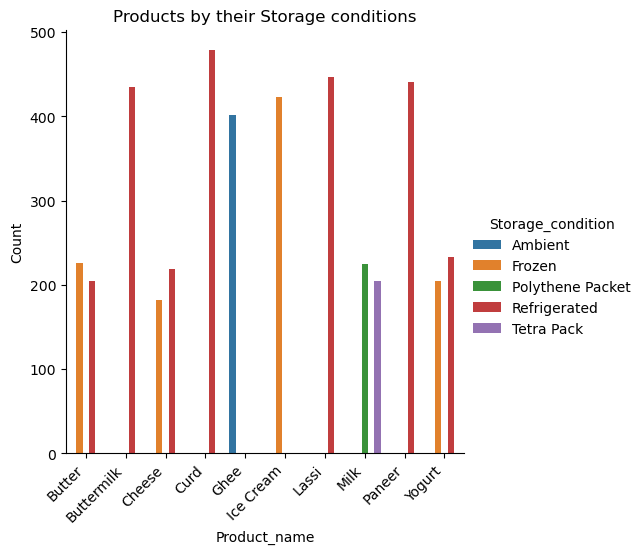

In [34]:
sns.catplot(x='Product_name',y='Count',hue='Storage_condition',data=data_melted,kind='bar')
plt.xticks(rotation=45,ha='right')
plt.title('Products by their Storage conditions')
plt.show()

####  Here ***Buttermilk,Curd,Ghee,Icecream,Lassi and Paneer*** are stored in *unique conditions* compared to others.*Most dairy products* are stored under *Refrigerated* condition for their quality and longevity.This variety ensures that products maintain their quality and shelf life.

## 12. Total quantity sold respect to each sales channel

In [35]:
delivery_method=data.groupby('Sales_channel')['Quantity_sold_(liters/kg)'].sum().reset_index()
delivery_method

,Sales_channel,Quantity_sold_(liters/kg)
0,Online,329033
1,Retail,374807
2,Wholesale,369171


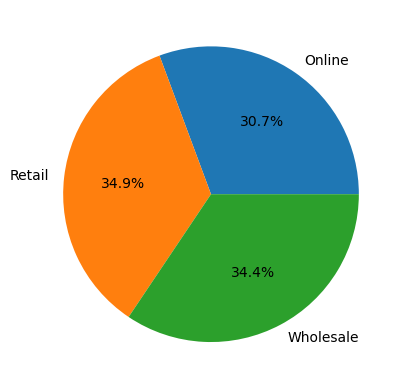

<Figure size 1000x800 with 0 Axes>

In [36]:
plt.pie(delivery_method['Quantity_sold_(liters/kg)'],labels=delivery_method['Sales_channel'],autopct='%1.1f%%')
plt.figure(figsize=(10,8))
plt.show()

#### From this we can infer that *more* product is sold through ***Retail***.This indicates a strong consumer preference for purchasing dairy products directly from retail stores.Products consumed through *Online* shows that it might possibly accelerated by digitalization and changing consumer behaviors.*Wholesale* is closely to Retail and it  suggests strong demand from businesses like restaurants and cafes, which buy in bulk to meet their needs.

## 13. Which brand sold more

In [37]:
data2=data.groupby('Brand')['Quantity_(liters/kg)'].sum().sort_values(ascending=False).reset_index()
data2

,Brand,Quantity_(liters/kg)
0,Amul,524520.50
1,Mother Dairy,509618.90
2,Raj,346728.91
3,Sudha,317012.61
4,Palle2patnam,104306.21
5,Dodla Dairy,103325.34
6,Warana,61359.00
7,Dynamix Dairies,52773.59
8,Parag Milk Foods,52017.97
9,Passion Cheese,51165.57


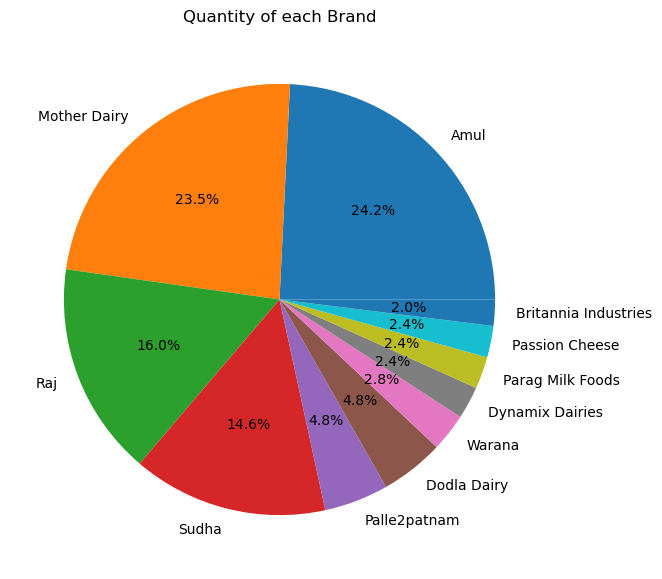

In [38]:
plt.figure(figsize=(10,7))
plt.pie(data2['Quantity_(liters/kg)'],labels=data2['Brand'],autopct='%1.1f%%')
plt.title('Quantity of each Brand')
plt.show()

#### ***Amul*** leads with the highest quantity followed closely by ***Mother Dairy***.The brands like **Britannia Industries,Passion Cheese,Parag Milk Foods etc** hold lower quantity beacuse it might be newer,focused on smaller geographic areas or niche products(allow companies to focus on specific customer needs).The Quantity of each *brand* also closely depend on the *area of production*.

## 14.How does the storage condition affect the shelf life of the products

In [39]:
data3=data.groupby('Storage_condition')['Shelf_life_(days)'].sum().reset_index()
data3

,Storage_condition,Shelf_life_(days)
0,Ambient,42508
1,Frozen,33646
2,Polythene Packet,331
3,Refrigerated,44279
4,Tetra Pack,5213


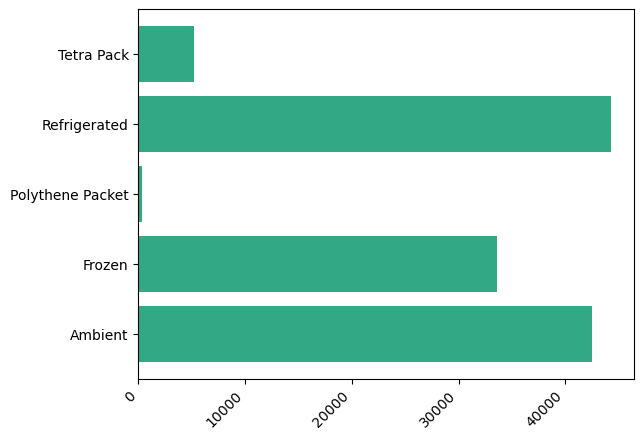

In [40]:
plt.barh(data3['Storage_condition'],data3['Shelf_life_(days)'],color='#32a885')
plt.xticks(rotation=45, ha='right')
plt.show()

#### *Storage conditions* have a significant impact on the *shelf life* of products, as different environments affect how long a product can maintain quality, safety, and usability.Products stored in ***Refrigerated*** followed closely by ***Ambient storage*** conditions show the ***more shelf life*** because,cold temperatures slow down bacterial growth and chemical reaction which help in extension of shelf life.The choice of *packaging* such as ***Polythene Packet*** also influences *shelf life*, as packaging can provide a barrier to oxygen, moisture, and light, they may not provide the preservation capabilities necessary for extremely long storage compared to controlled environmental conditions.

## 15. which brand sold the most over the year 

In [41]:
data['Date']=pd.to_datetime(data['Date'])
data['Date']                                   ## it is already in datetime format

0      2022-02-17
1      2021-12-01
2      2022-02-28
3      2019-06-09
4      2020-12-14
          ...    
4320   2022-02-24
4321   2022-05-14
4322   2020-01-05
4323   2022-10-25
4324   2019-01-20
Name: Date, Length: 4325, dtype: datetime64[ns]

In [42]:
data['Year']=data['Date'].dt.year
data['Year']

0       2022
1       2021
2       2022
3       2019
4       2020
        ... 
4320    2022
4321    2022
4322    2020
4323    2022
4324    2019
Name: Year, Length: 4325, dtype: int64

In [43]:
yearly_brand_sales=data.groupby(['Year','Brand'])['Quantity_sold_(liters/kg)'].sum().reset_index()
yearly_brand_sales

,Year,Brand,Quantity_sold_(liters/kg)
0,2019,Amul,65568
1,2019,Britannia Industries,5504
2,2019,Dodla Dairy,12698
3,2019,Dynamix Dairies,6803
4,2019,Mother Dairy,71219
5,2019,Palle2patnam,10361
6,2019,Parag Milk Foods,8247
7,2019,Passion Cheese,9476
8,2019,Raj,43405
9,2019,Sudha,36815


In [44]:
df=pd.DataFrame(yearly_brand_sales)
df

,Year,Brand,Quantity_sold_(liters/kg)
0,2019,Amul,65568
1,2019,Britannia Industries,5504
2,2019,Dodla Dairy,12698
3,2019,Dynamix Dairies,6803
4,2019,Mother Dairy,71219
5,2019,Palle2patnam,10361
6,2019,Parag Milk Foods,8247
7,2019,Passion Cheese,9476
8,2019,Raj,43405
9,2019,Sudha,36815


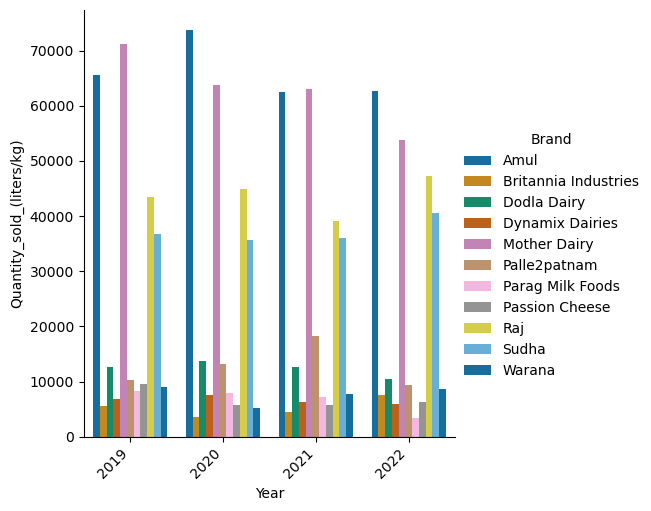

In [45]:
sns.catplot(data=df,x='Year',y='Quantity_sold_(liters/kg)',hue='Brand',kind='bar',palette='colorblind')
plt.xticks(rotation=45, ha='right')
plt.show()

In [46]:
df_2022 = df[df['Year'] == 2022]
df_2022.index = range(1, len(df_2022) + 1)
df_2022

df_2021 = df[df['Year'] == 2021]
df_2021.index = range(1, len(df_2021) + 1)

df_2020 = df[df['Year'] == 2020]
df_2020.index = range(1, len(df_2020) + 1)

df_2019 = df[df['Year'] == 2019]
df_2019.index = range(1, len(df_2019) + 1)



In [47]:
df_2022

,Year,Brand,Quantity_sold_(liters/kg)
1,2022,Amul,62680
2,2022,Britannia Industries,7492
3,2022,Dodla Dairy,10480
4,2022,Dynamix Dairies,6002
5,2022,Mother Dairy,53694
6,2022,Palle2patnam,9439
7,2022,Parag Milk Foods,3313
8,2022,Passion Cheese,6255
9,2022,Raj,47291
10,2022,Sudha,40523


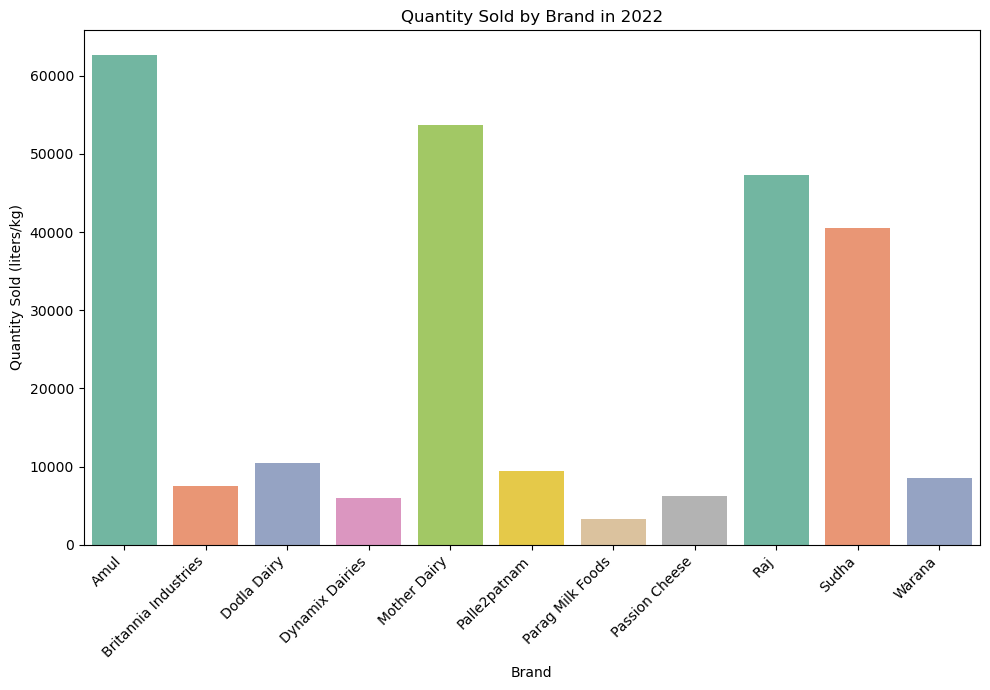

In [48]:
plt.figure(figsize=(10, 7))

sns.barplot(data=df_2022,x="Brand",y="Quantity_sold_(liters/kg)",palette="Set2")

plt.xlabel('Brand')
plt.ylabel('Quantity Sold (liters/kg)')
plt.title('Quantity Sold by Brand in 2022')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
df_2021

,Year,Brand,Quantity_sold_(liters/kg)
1,2021,Amul,62540
2,2021,Britannia Industries,4496
3,2021,Dodla Dairy,12677
4,2021,Dynamix Dairies,6329
5,2021,Mother Dairy,63100
6,2021,Palle2patnam,18214
7,2021,Parag Milk Foods,7282
8,2021,Passion Cheese,5798
9,2021,Raj,39159
10,2021,Sudha,35964


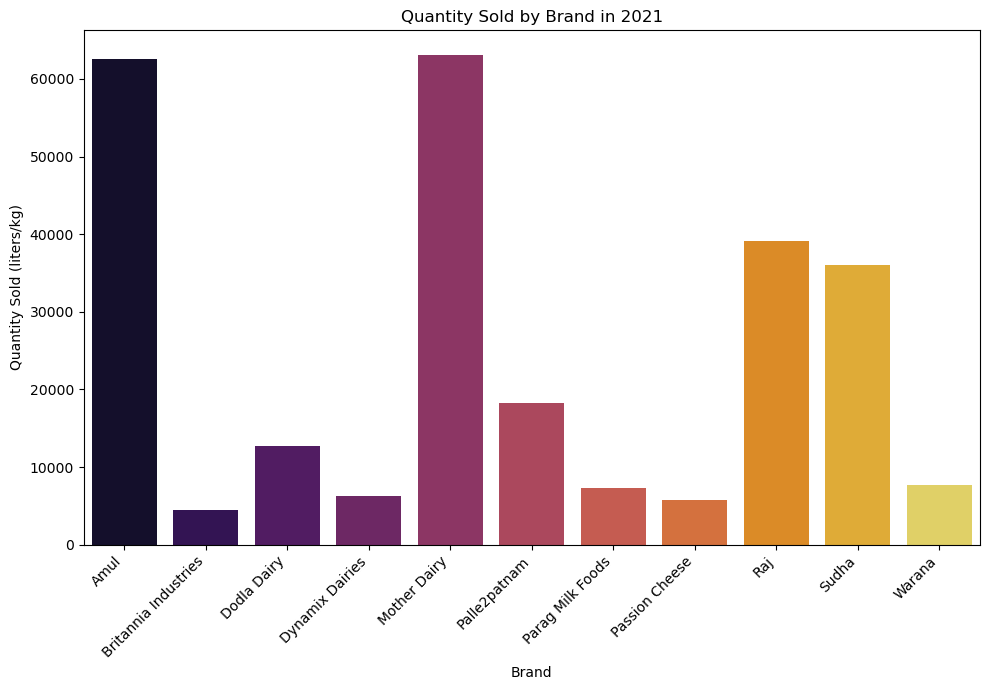

In [50]:
plt.figure(figsize=(10, 7))

sns.barplot(data=df_2021,x="Brand",y="Quantity_sold_(liters/kg)",palette="inferno")

plt.xlabel('Brand')
plt.ylabel('Quantity Sold (liters/kg)')
plt.title('Quantity Sold by Brand in 2021')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [51]:
df_2020

,Year,Brand,Quantity_sold_(liters/kg)
1,2020,Amul,73662
2,2020,Britannia Industries,3555
3,2020,Dodla Dairy,13812
4,2020,Dynamix Dairies,7638
5,2020,Mother Dairy,63732
6,2020,Palle2patnam,13105
7,2020,Parag Milk Foods,7920
8,2020,Passion Cheese,5767
9,2020,Raj,44887
10,2020,Sudha,35615


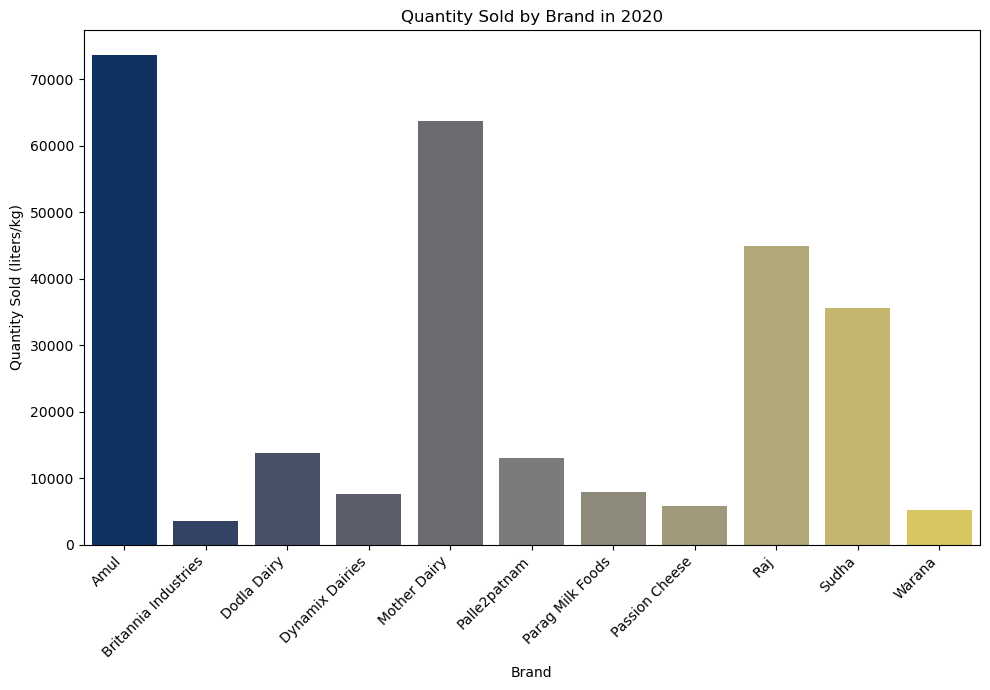

In [52]:
plt.figure(figsize=(10, 7))

sns.barplot(data=df_2020,x="Brand",y="Quantity_sold_(liters/kg)",palette="cividis")

plt.xlabel('Brand')
plt.ylabel('Quantity Sold (liters/kg)')
plt.title('Quantity Sold by Brand in 2020')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
df_2019

,Year,Brand,Quantity_sold_(liters/kg)
1,2019,Amul,65568
2,2019,Britannia Industries,5504
3,2019,Dodla Dairy,12698
4,2019,Dynamix Dairies,6803
5,2019,Mother Dairy,71219
6,2019,Palle2patnam,10361
7,2019,Parag Milk Foods,8247
8,2019,Passion Cheese,9476
9,2019,Raj,43405
10,2019,Sudha,36815


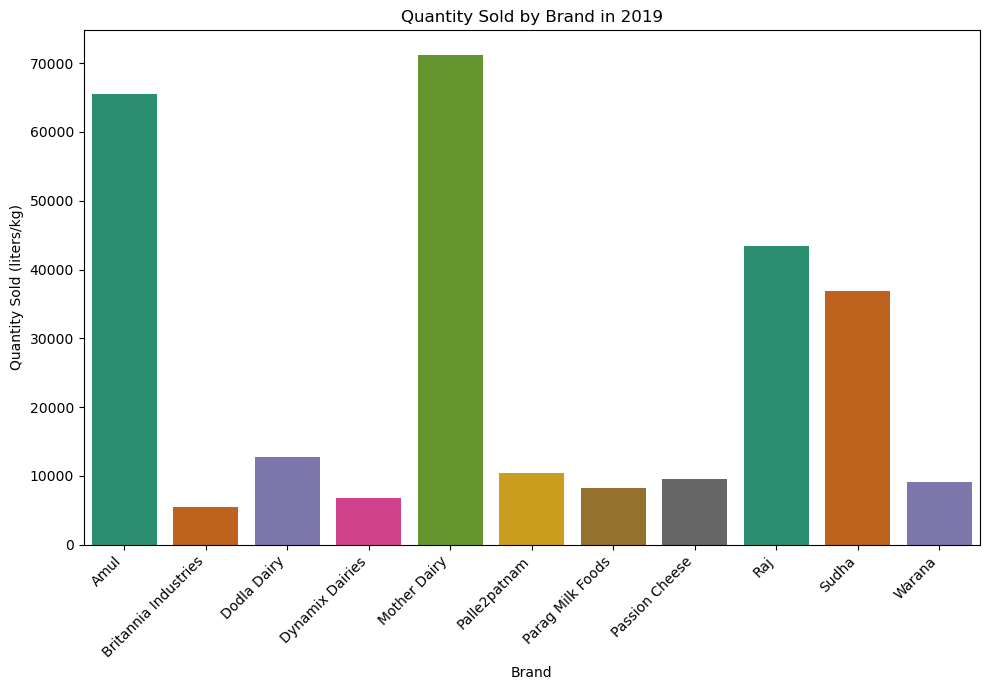

In [54]:
plt.figure(figsize=(10, 7))

sns.barplot(data=df_2019,x="Brand",y="Quantity_sold_(liters/kg)",palette="Dark2")

plt.xlabel('Brand')
plt.ylabel('Quantity Sold (liters/kg)')
plt.title('Quantity Sold by Brand in 2019')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

#### From these past 4 years (*2019,2020,2021,2022*) ***Amul*** and ***Mother Diary*** is in a competition for the production.**Amul's** sales turnover has *grown* consistently which has helped India become the world's largest milk producer.Both Amul and Mother Dairy have shown consistent growth in production and sales, reflecting their strong market presence and consumer demand for dairy products.Other brands shows small variations in the production for the past few years.

## 16. Which sales channels are most popular among customers?

In [55]:
sales_channel=data.groupby('Location')['Sales_channel'].value_counts().reset_index(name='count')
sales_channel[sales_channel['Location']=='Delhi'].iloc[:,1:]

,Sales_channel,count
6,Retail,193
7,Wholesale,176
8,Online,156


# ***CONCLUSION***

### The ***Dairy Goods Sales*** offers a wealth of information about the production, storage, sales, and distribution of dairy products in India. From this Project,we conclude that which product and which state produce more products and reasons for the production.We can see that **AMUL** has produced more in overall production sales of about **524520.50Kg**.Due to urbanisation and population growth in **Delhi and Mumbai *(267502.01)***,it has more land area for Dairy production.For past few years,both ***Amul and Mother Diary*** have shown consistent growth in production and sales reflecting their strong market presence and consumer demand for dairy products.
### The dataset highlights the diversity in storage conditions such as ***Ambient, Frozen, and Refrigerated***, which are crucial for maintaining the *quality and shelf life* of different dairy products.Analysing across ***Sales channel***,**Retail dominates**,but **Online sales are growing** reflecting the shift towards e-commerce.
### Overall the data reveals that trends in production volumes,sales growth and consumer preferences for marketing and improving the efficiency and effectiveness of a supply chain.
